In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#filename_base = "xp2_migr_20180619084743" # 20, 0
#filename_base="xp2_migr_20180619094324" #20,25
#filename_base="xp2_migr_20180618225904" # 20, 50

experiments = glob.glob("./results/*")

df = None
df_migr = None
df_agent = None
for experiment in experiments:
    filename_base = experiment.split("/")[2]

    #filename_base="xp2_migr_20180621170259_50_0" # 50 agents, 0 active processes (which are going to be migrated)
    #filename_base="xp2_migr_20180623033156_50_25" # 50,25
    #filename_base="xp2_migr_20180623151601_50_50" #50,50
    
    split_experiment = filename_base.split("_")
    if len(split_experiment)<5:
        continue

    files = glob.glob("./results/{0}/*.csv".format(filename_base))
    print (experiment)
    for f in files:
        #print (f)
        filename=os.path.basename(f)
        name = filename.split(".")[0].split("_")
        #print (name)
        if ("_pre_" in filename) or ("_post_" in filename):
            df_tmp = pd.read_csv(f,parse_dates=["start", "end"], sep=",")

            df_tmp["agent_nb"] = int(split_experiment[3])
            df_tmp["active_process_nb"] = int(split_experiment[4])
            
            df_tmp["faban_agent"] = int(name[4])
            if "_pre_" in filename:
                df_tmp["type"] = "pre"
            if "_post_" in filename:
                df_tmp["type"] = "post"
            df_tmp["taskId"] = df_tmp["task_id"]
            df_tmp["relative_start"] = (df_tmp["start"] - df_tmp["start"].min()).astype("timedelta64[ms]")
            #df_tmp = df_tmp.set_index(["task_id","type", "agent_nb", "active_process_nb"])
            if df is None:
                df = df_tmp
            else:
                df = pd.concat([df, df_tmp])
        if ("_migr_" in filename):
            df_tmp = pd.read_csv(f)
            if df_migr is None:
                df_migr = df_tmp
            else:
                df_migr = pd.concat([df_migr, df_tmp])
        if ("_agent" in filename):
            df_tmp = pd.read_csv(f, sep=",",parse_dates=["Ready_Time", "Req_retrieve_Time","Resp_retrieve_Time","Req_Assign_Tim","Resp_Assign_Time","Req_exec_Time","Resp_exec_Time","Retrive_Time","Assign_Time","Exec_Time"])
            if "pre_" in filename:
                df_tmp["type"] = "pre"
            if "post_" in filename:
                df_tmp["type"] = "post"
            df_tmp["agent_nb"] = int(split_experiment[3])
            df_tmp["active_process_nb"] = int(split_experiment[4])
            df_tmp["faban_agent"] = int(name[4])    
            #df_tmp = df_tmp.set_index(["taskId","type", "agent_nb", "active_process_nb"])
            
            if df_agent is None:
                df_agent = df_tmp
            else:
                df_agent = pd.concat([df_agent, df_tmp])
df.describe()

#
#all_data

./results/xp2_migr_20180623033156_50_25


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



./results/xp2_migr_20180621170259_50_0
./results/xp2_migr_20180623151601_50_50


,Unnamed: 0,id,ready,task_id,task_start,task_ready,task_assign,task_end,duration,agent_nb,active_process_nb,faban_agent,taskId,relative_start
count,16463.000000,16463.000000,1.595400e+04,16460.000000,1.646000e+04,1.596600e+04,1.596600e+04,1.596100e+04,15954.000000,16463.0,16463.000000,16463.000000,16460.000000,16463.000000
mean,563.809998,790.425439,1.529740e+12,10972.996173,1.529740e+12,1.529740e+12,1.529740e+12,1.529740e+12,6093.172559,50.0,23.230881,3.008808,10972.996173,43834.233493
std,454.916006,558.509865,2.129579e+07,10061.849725,2.135772e+07,2.128813e+07,2.129296e+07,2.129615e+07,11640.995705,0.0,20.086073,1.840858,10061.849725,39314.973200
min,0.000000,1.000000,1.529714e+12,2.000000,1.529714e+12,1.529714e+12,1.529714e+12,1.529714e+12,159.000000,50.0,0.000000,1.000000,2.000000,0.000000
25%,228.000000,229.000000,1.529716e+12,655.000000,1.529716e+12,1.529716e+12,1.529716e+12,1.529716e+12,718.000000,50.0,0.000000,1.000000,655.000000,17592.500000
50%,457.000000,1007.000000,1.529743e+12,20016.000000,1.529743e+12,1.529743e+12,1.529743e+12,1.529743e+12,3587.500000,50.0,25.000000,3.000000,20016.000000,31277.000000
75%,728.000000,1236.000000,1.529767e+12,20699.000000,1.529767e+12,1.529767e+12,1.529767e+12,1.529767e+12,7020.000000,50.0,50.000000,5.000000,20699.000000,47522.500000
max,2001.000000,2047.000000,1.529769e+12,23136.000000,1.529769e+12,1.529769e+12,1.529769e+12,1.529769e+12,85546.000000,50.0,50.000000,6.000000,23136.000000,157760.000000


In [3]:
df_agent.describe()

,caseId,taskId,Retrive_Exec,Ag_Time,Ready_Exec,agent_nb,active_process_nb,faban_agent
count,15970.000000,15970.000000,15970.000000,15970.000000,15970.000000,15970.0,15970.000000,15970.000000
mean,771.414903,10658.871885,400.002192,15.304947,5836.726362,50.0,22.780213,2.988854
std,554.927226,10050.798034,770.284615,70.947657,11611.470299,0.0,20.015584,1.841894
min,1.000000,2.000000,46.000000,1.000000,71.000000,50.0,0.000000,1.000000
25%,222.000000,635.000000,141.000000,5.000000,530.000000,50.0,0.000000,1.000000
50%,856.000000,2550.500000,212.000000,9.000000,3304.000000,50.0,25.000000,3.000000
75%,1217.000000,20639.750000,349.000000,16.000000,6748.750000,50.0,50.000000,5.000000
max,2047.000000,23136.000000,9531.000000,3529.000000,84640.000000,50.0,50.000000,6.000000


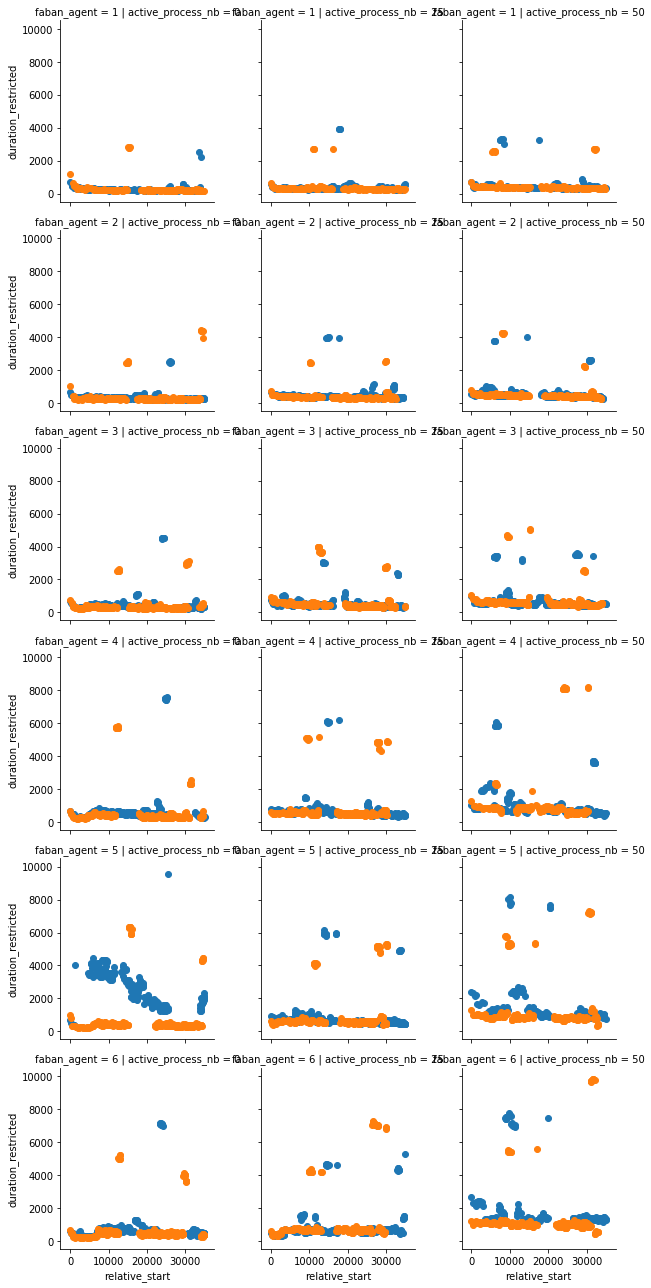

In [4]:
all_data = pd.merge(df, df_agent, on=["taskId","type", "agent_nb", "active_process_nb", "faban_agent"])
all_data["ready"] = pd.to_datetime(all_data["ready"]/1000, unit="s")

all_data["task_start"] = pd.to_datetime(all_data["task_start"]/1000, unit="s")
all_data["task_ready"] = pd.to_datetime(all_data["task_ready"]/1000, unit="s")
all_data["task_assign"] = pd.to_datetime(all_data["task_assign"]/1000, unit="s")
all_data["task_end"] = pd.to_datetime(all_data["task_end"]/1000, unit="s")
all_data["duration_agent"] = ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"])).astype('timedelta64')
all_data["duration_restricted"] = (all_data["end"] - all_data["start"] - ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"]))).astype('timedelta64[ms]')
all_data["retrieve_duration"] = (all_data["Req_retrieve_Time"] - all_data["task_ready"]).astype('timedelta64[ms]')
all_data = all_data[all_data["relative_start"] <= 35000]
#print (all_data["relative_start"].sort_values().astype("timedelta64[ms]"))
g = sns.FacetGrid(all_data, col="active_process_nb",  row="faban_agent", hue="type")
g = (g.map(plt.scatter, "relative_start", "duration_restricted"))

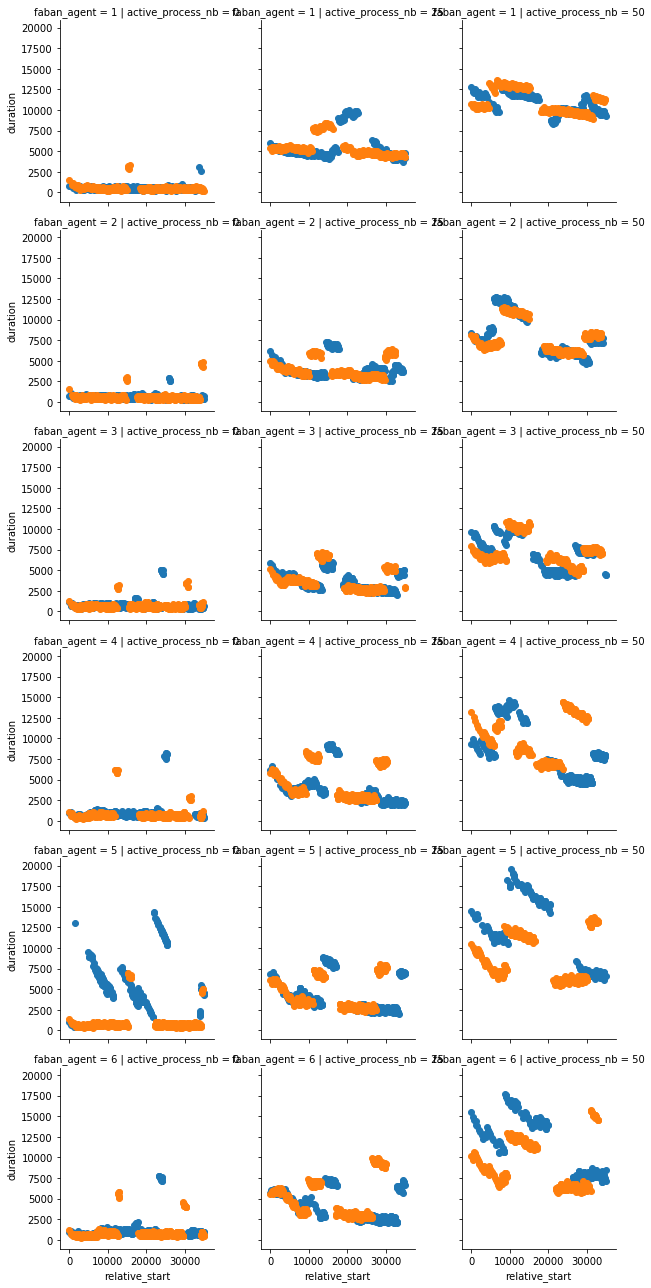

In [5]:
g = sns.FacetGrid(all_data, col="active_process_nb",  row="faban_agent", hue="type")
g = (g.map(plt.scatter, "relative_start", "duration"))

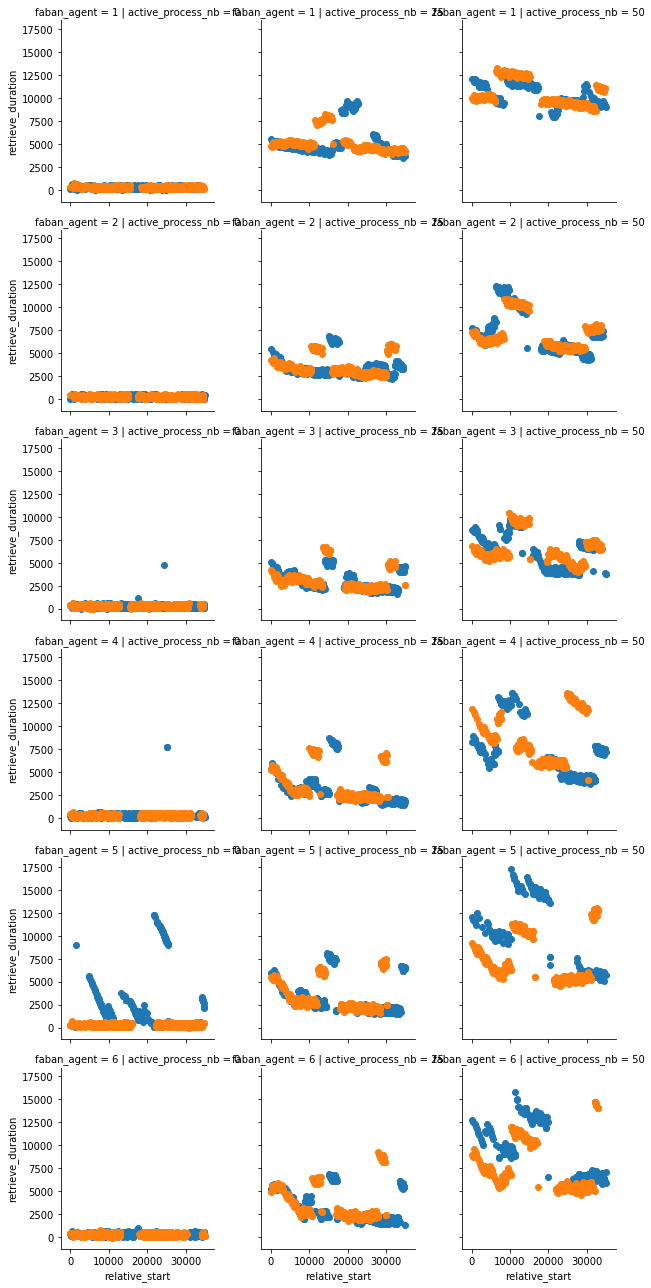

In [6]:
g = sns.FacetGrid(all_data, col="active_process_nb",  row="faban_agent", hue="type")
g = (g.map(plt.scatter, "relative_start", "retrieve_duration"))

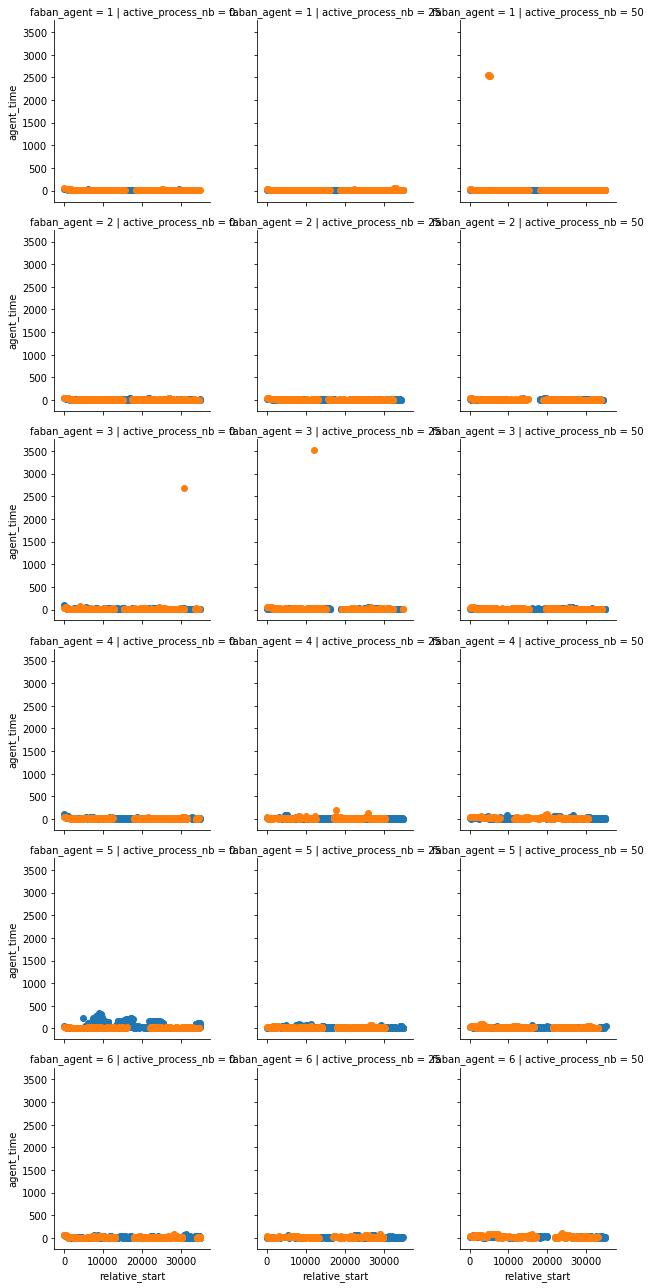

In [7]:
all_data["agent_time"] = ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"])).astype('timedelta64[ms]')
g = sns.FacetGrid(all_data, col="active_process_nb",  row="faban_agent", hue="type")
g = (g.map(plt.scatter, "relative_start", "agent_time"))

In [8]:
all_data.groupby(["active_process_nb", "faban_agent","type"])["Originator"].nunique()

active_process_nb  faban_agent  type
0                  1            post     4
                                pre      4
                   2            post     7
                                pre      7
                   3            post     9
                                pre     10
                   4            post     9
                                pre     10
                   5            post    50
                                pre     10
                   6            post    13
                                pre     12
25                 1            post     5
                                pre      4
                   2            post     8
                                pre      8
                   3            post    11
                                pre     10
                   4            post    13
                                pre     12
                   5            post    13
                                pre     13
                 

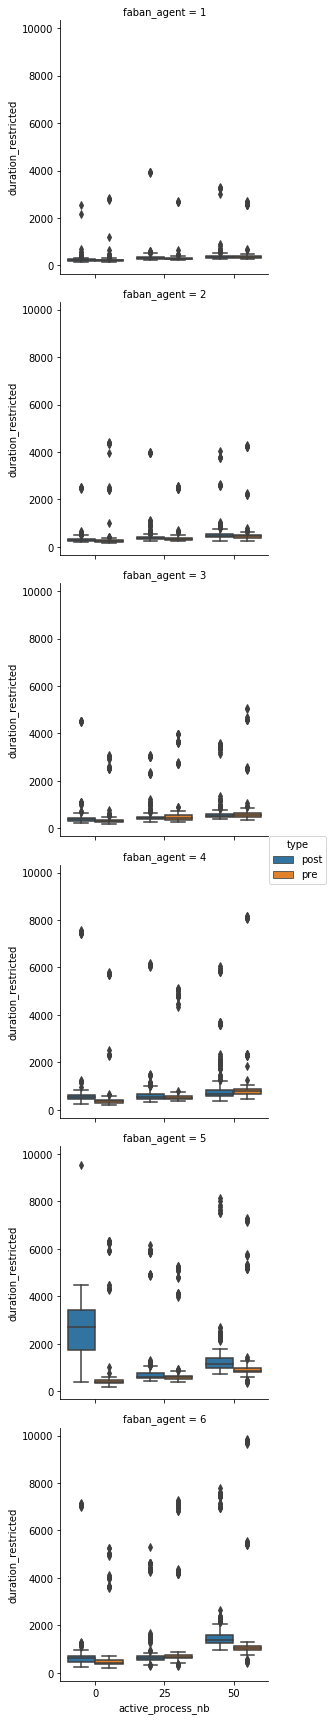

In [25]:

#f = all_data.set_index(pd.DatetimeIndex(all_data["relative_start"])).resample("1s", how="mean")

#df.resample("1s", how="mean").plot(y="duration", style="ro",ax=ax)
#sns.factorplot(x="start", y="duration", hue="faban_agent", data=df)
#g = sns.FacetGrid(all_data, col="active_process_nb",  row="faban_agent", hue="type")
#g = (g.map(sns.boxplot, "start", "duration"))
sns.factorplot(x="active_process_nb", y="duration_restricted", row="faban_agent",  hue="type", data=all_data, kind="box", ci="sd")

#df[df["type"] =="pre"].groupby(["faban_agent"]).plot(y="duration", style="ro", ax=ax)
#df[df["type"] =="post"].groupby(["faban_agent"]).plot(y="duration", style="bx",ax=ax)
#df.groupby("faban_agent").resample("1s", how="mean").plot(y="duration", style="ro",ax=ax)
#fig, ax = plt.subplots()
#df[df["type"] =="pre"].groupby(["faban_agent"]).mean().plot(y="duration", ax=ax, label="pre")
#df[df["type"] =="post"].groupby(["faban_agent"]).mean().plot(y="duration", ax=ax, label="post")
#fig, ax = plt.subplots()
#df[df["type"] =="pre"].groupby(["faban_agent"]).std().plot(y="duration", ax=ax, label="pre")
#df[df["type"] =="post"].groupby(["faban_agent"]).std().plot(y="duration", ax=ax, label="post")


In [22]:
all_data.groupby(["active_process_nb",  "faban_agent","type"])["duration_restricted"].describe()

count         mean          std    min  \
active_process_nb faban_agent type                                           
0                 1           post  205.0   259.492683   220.766570  143.0   
                              pre   175.0   282.274286   396.685237  140.0   
                  2           post  283.0   352.855124   322.977104  186.0   
                              pre   298.0   398.630872   713.784756  168.0   
                  3           post  291.0   516.890034   688.663865  225.0   
                              pre   302.0   407.354305   482.124262  179.0   
                  4           post  242.0   754.681818  1253.292362  229.0   
                              pre   305.0   566.236066   960.644461  186.0   
                  5           post  234.0  2626.482906  1078.933797  382.0   
                              pre   325.0   684.603077  1225.831096  176.0   
                  6           post  284.0   859.147887  1265.394308  232.0   
                              pre   308.0   674.737013   966.312733  187.0   
25                1           post  175.0   410.457143   544.737949  226.0   
                              pre   180.0   345.938889   359.335765  213.0   
                  2           post  262.0   506.358779   591.770246  248.0   
                              pre   263.0   412.087452   375.176004  238.0   
                  3           post  338.0   544.195266   456.911354  287.0   
                              pre   301.0   672.853821   795.978378  266.0   
                  4           post  302.0   721.377483   908.823040  310.0   
                              pre   264.0   925.185606  1278.652466  361.0   
                  5           post  337.0   947.225519  1166.725455  430.0   
                              pre   288.0   993.927083  1245.103823  401.0   
                  6           post  316.0   898.879747   970.015286  286.0   
                              pre   273.0  1344.930403  1894.587575  296.0   
50                1           post  167.0   490.820359   538.582525  290.0   
                              pre   170.0   483.111765   509.589386  273.0   
                  2           post  254.0   614.094488   588.543354  235.0   
                              pre   250.0   559.468000   623.129813  258.0   
                  3           post  284.0   805.968310   814.623511  383.0   
                              pre   283.0   726.996466   754.081803  344.0   
                  4           post  263.0  1021.011407  1019.383448  368.0   
                              pre   207.0  1259.111111  1806.510328  441.0   
                  5           post  161.0  1606.260870  1487.031323  747.0   
                              pre   241.0  1399.962656  1613.641749  336.0   
                  6           post  177.0  2095.378531  1892.779104  951.0   
                              pre   234.0  1593.995726  2031.128768  393.0   

                                        25%     50%      75%     max  
active_process_nb faban_agent type                                    
0                 1           post   200.00   221.0   254.00  2531.0  
                              pre    183.50   206.0   235.00  2822.0  
                  2           post   255.00   289.0   346.00  2520.0  
                              pre    216.25   246.0   283.00  4405.0  
                  3           post   311.00   381.0   455.00  4533.0  
                              pre    260.00   301.5   346.50  3097.0  
                  4           post   433.25   528.0   603.50  7573.0  
                              pre    282.00   350.0   425.00  5816.0  
                  5           post  1744.25  2711.0  3430.00  9530.0  
                              pre    332.00   377.0   453.00  6348.0  
                  6           post   468.50   621.0   720.75  7134.0  
                              pre    370.00   426.5   516.00  5241.0  
25                1           post   272.00   304.0   364.50  3938.0  
      

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

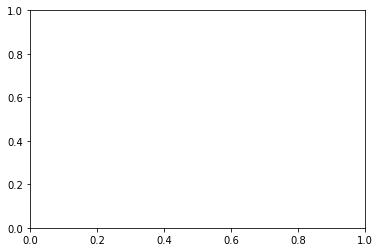

In [113]:
for i in range(1,6):
    fig,ax=plt.subplots()
    d = df[(df["faban_agent"] == i) & (df["type"] == "pre")]
    d.resample("1s").mean().plot(y="duration", style="ro",ax=ax,label="pre")
    d = df[(df["faban_agent"] == i) & (df["type"] == "post")]
    d.resample("1s").mean().plot( y="duration", style="bx",ax=ax,label="post")


NameError: name 'all_df' is not defined